## Used Snscrape for scrapping Data from Twitter

In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import snscrape.modules.twitter as sntwitter 
import pandas as pd

##Scrapping & analyzing tweets of #Layoffs

In [ ]:
number_of_tweets = 15
search_key = "#layoffs"
starts_date = "2022-09-01"
ends_date = "2022-11-21"
tweets=[]
language = 'english'
limit = 15000

In [ ]:
extracted_tweets = "snscrape --format '{content!r}'"+ f" --max-results {number_of_tweets} --since {starts_date} twitter-search '{search_key} lang:{language} until:{ends_date}' > try.txt"


In [ ]:
for tweet in sntwitter.TwitterSearchScraper(search_key).get_items():
  if len(tweets) == limit:
    break   
  else:
    tweets.append([tweet.content])

In [ ]:
extracted_tweets

"snscrape --format '{content!r}' --max-results 15 --since 2022-09-01 twitter-search '#layoffs lang:english until:2022-11-21' > try.txt"

In [ ]:
df = pd.DataFrame(tweets) 
df.head(5)

,0
0,Amazon has shuttered its third business in Ind...
1,"Google has avoided mass layoffs so far, but em..."
2,"NewsPoint Daily News Brief, Nov 28: Breakthrou..."
3,"To understand the recent #layoffs in Big Tech,..."
4,Will Google's generative AI be able to replace...


In [ ]:
df.dropna(inplace = True)

In [ ]:
df

,0
0,Amazon has shuttered its third business in Ind...
1,"Google has avoided mass layoffs so far, but em..."
2,"NewsPoint Daily News Brief, Nov 28: Breakthrou..."
3,"To understand the recent #layoffs in Big Tech,..."
4,Will Google's generative AI be able to replace...
...,...
14995,GE Healthcare: Visitors are discussing potenti...
14996,GEICO: Visitors are discussing potential and/o...
14997,Devon Energy: Visitors are discussing potentia...
14998,Accenture: Visitors are discussing potential a...


##PreProcessing

In [ ]:
import re

In [ ]:
def preprocess_tweet(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only in lowercase'''

    sentence = sen.lower() # Remove RT
    sentence = re.sub('RT @\w+: '," ", sentence) # Remove special characters
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence) # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence) # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Henc # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence) # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. 
    return sentence

In [ ]:
cleaned_tweets = []
for tweet in df[0]:
    cleaned_tweet = preprocess_tweet(tweet) 
    cleaned_tweets.append(cleaned_tweet)

In [ ]:
#The best part of this library package is that one can find score sentiment of different languages as well.

In [ ]:
df['cleaned'] = pd.DataFrame(cleaned_tweets)
df.head(30)

,0,cleaned
0,Amazon has shuttered its third business in Ind...,amazon has shuttered its third business in ind...
1,"Google has avoided mass layoffs so far, but em...",google has avoided mass layoffs so far but emp...
2,"NewsPoint Daily News Brief, Nov 28: Breakthrou...",newspoint daily news brief nov 28 breakthrough...
3,"To understand the recent #layoffs in Big Tech,...",to understand the recent layoffs in big tech y...
4,Will Google's generative AI be able to replace...,will google generative ai be able to replace h...
5,The tech industry is experiencing an increase ...,the tech industry is experiencing an increase ...
6,top: There has been an upsurge in the number o...,top there has been an upsurge in the number of...
7,National Oilwell Varco: Visitors are discussin...,national oilwell varco visitors are discussing...
8,Baker Hughes: Visitors are discussing potentia...,baker hughes visitors are discussing potential...
9,CVS: Visitors are discussing potential and/or ...,cvs visitors are discussing potential and or a...


#Using Affin Library for Sentiment Analysis

In [ ]:
pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.3 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=84e0e7bd8bf4a591bba68d3867e643b5b6365eee0792d30c5042e7f7d3c50e13
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [ ]:
from afinn import Afinn
import pandas as pd
 
#instantiate afinn
afn = Afinn()
 
#creating list sentences
df = [cleaned_tweets]
          
# compute scores (polarity) and labels
scores = [afn.score(df) for df in cleaned_tweets]
sentiment = ['positive' if score > 0
                          else 'negative' if score < 0
                              else 'neutral'
                                  for score in scores]
     
# dataframe creation
df = pd.DataFrame()
df['cleaned'] =  cleaned_tweets
df['scores'] = scores
df['sentiments'] = sentiment
print(df)

                                                 cleaned  scores sentiments
0      amazon has shuttered its third business in ind...     0.0    neutral
1      google has avoided mass layoffs so far but emp...    -4.0   negative
2      newspoint daily news brief nov 28 breakthrough...     2.0   positive
3      to understand the recent layoffs in big tech y...    -2.0   negative
4      will google generative ai be able to replace h...     0.0    neutral
...                                                  ...     ...        ...
14995  ge healthcare visitors are discussing potentia...     0.0    neutral
14996  geico visitors are discussing potential and or...     0.0    neutral
14997  devon energy visitors are discussing potential...     0.0    neutral
14998  accenture visitors are discussing potential an...     0.0    neutral
14999  seaworld visitors are discussing potential and...     0.0    neutral

[15000 rows x 3 columns]


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
df_negative = df[df["sentiments"]=="negative"] 
df_positive = df[df["sentiments"]=="positive"] 
df_neutral = df[df["sentiments"]=="neutral"]

In [ ]:
df_negative.head()

,cleaned,scores,sentiments
1,google has avoided mass layoffs so far but emp...,-4.0,negative
3,to understand the recent layoffs in big tech y...,-2.0,negative
6,top there has been an upsurge in the number of...,-1.0,negative
17,wells fargo visitors are discussing potential ...,-2.0,negative
18,vmware visitors are discussing potential and o...,-2.0,negative


In [ ]:
df_positive.head()

,cleaned,scores,sentiments
2,newspoint daily news brief nov 28 breakthrough...,2.0,positive
5,the tech industry is experiencing an increase ...,1.0,positive
56,adhaan solutions pvt ltd gets featured in bus...,5.0,positive
57,agree layoffs,1.0,positive
61,fresenius medical care ag and co kgaa visitors...,4.0,positive


In [ ]:
df_neutral.head()

,cleaned,scores,sentiments
0,amazon has shuttered its third business in ind...,0.0,neutral
4,will google generative ai be able to replace h...,0.0,neutral
7,national oilwell varco visitors are discussing...,0.0,neutral
8,baker hughes visitors are discussing potential...,0.0,neutral
9,cvs visitors are discussing potential and or a...,0.0,neutral


In [ ]:
def count_values_in_column(data,feature): 
  total=data.loc[:,feature].value_counts(dropna=False) 
  percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2) 
  return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [ ]:
#Count_values for sentiment
count_values_in_column(df,"sentiments")

,Total,Percentage
neutral,6735,44.90
negative,5238,34.92
positive,3027,20.18


In [ ]:
#Calculating tweet's lenght and word count
df['text_len'] = df['cleaned'].astype(str).apply(len)
df['text_word_count'] = df['cleaned'].apply(lambda x: len(str(x).split()))

In [ ]:
round(pd.DataFrame(df.groupby("sentiments").text_len.mean()),2)

,text_len
sentiments,
negative,163.61
neutral,142.54
positive,173.77


In [ ]:
round(pd.DataFrame(df.groupby("sentiments").text_word_count.mean()),2)

,text_word_count
sentiments,
negative,24.22
neutral,20.13
positive,27.72


In [ ]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
df1 = count_values_in_column(df,"sentiments")

In [ ]:
df1

,Total,Percentage
neutral,6735,44.90
negative,5238,34.92
positive,3027,20.18


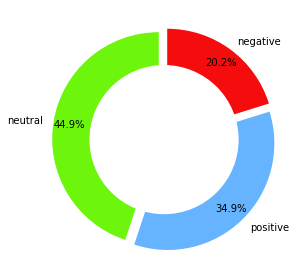

In [ ]:
# Pie chart
labels = ['neutral', 'positive', 'negative']
sizes = df1['Percentage']
#colors
colors = ['#6df50c','#66b3ff','#f50c0c']


#explsion
explode = (0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle 
plt.tight_layout()
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
text = " ".join(review for review in df_negative["cleaned"].astype(str))
stopwords = set(STOPWORDS)

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, background_color="black", width=800, height=400).generate(text)

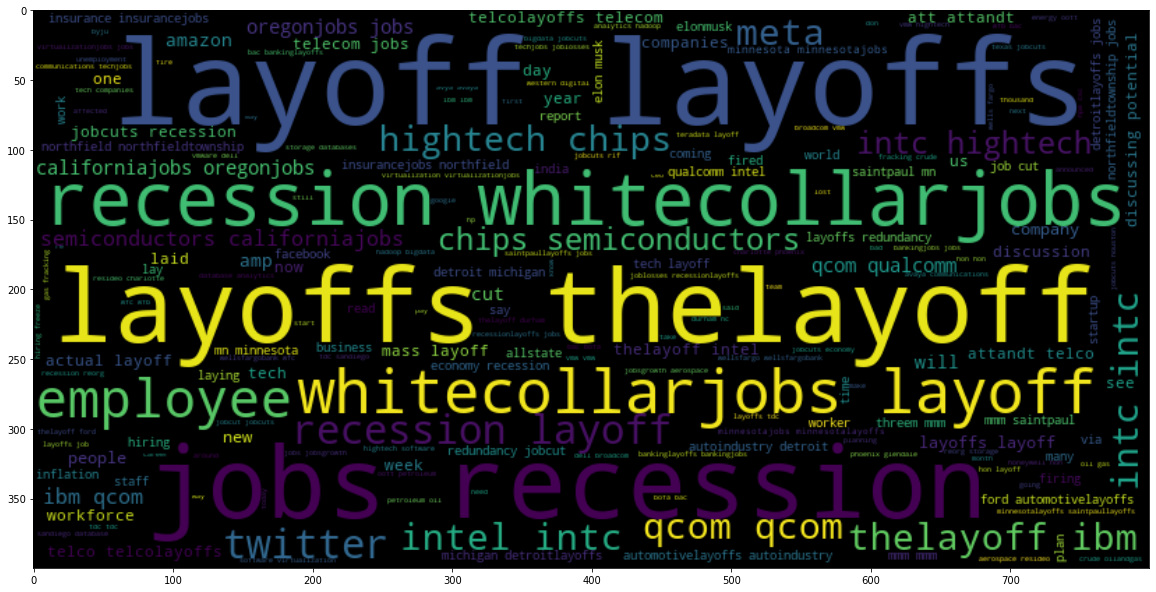

In [ ]:
plt.figure( figsize=(20,30))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()